# Module 1: Basic concepts of probability



## Outline for the day

* Basic concepts
    - Stochastic processes and probabilities
    - Sampling & Counting
* Set theory & Venn diagrams
    - Calculating with probabilities
* Frequency histograms and cumulative frequency distributions


## Basic concepts

* A stochastic process is a process that involves *chance* (e.g. flipping a coin or taking a measurement)
* To express uncertainty quantitatively, we use numbers called probabilities

    - A priory probabilities ($P(A)=n_A/n$) require known experimental outcomes.
    - Probabilities calculated from the expected relative frequency ($P(A)=\lim_{n\to\infty} n_A/n$) are based on observations (and in practice not the true probability)
    - The likelihood of divergence (obs vs true probability) decreases with increasing number of trials (Law of large numbers)
    
### Vocabulary


__Outcome__ - The result of an experiment


__Sample Space__ - A list of all possible outcomes ($S$), aka population


__Element__ - Any particular point in the Sample Space


__Event__ - Any collection of elements (a subset of $S$)


__Frequency__ - The number of times something happens


__Relative Frequency__ - The frequency relative to the number of times it (e.g. something) could have happened.

### Example: Flipping a coin 200-times

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from random import randint

<IPython.core.display.Javascript object>


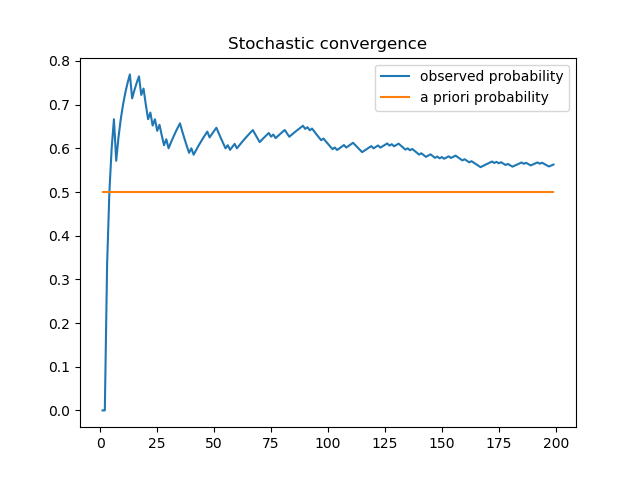

Text(0.5,1,'Stochastic convergence')

In [5]:
""" 
Heads = 1
Tails = 0
"""

trials = 200
outcomes = 0
prob = []

for trial in range(1, trials):
    outcome = randint(0, 1)
    outcomes += outcome
    prob.append(outcomes/float(trial))
    
plt.plot(range(1,trials), prob, label='observed probability')
plt.plot(range(1,trials), np.ones(trials-1)*0.5, label='a priori probability')
plt.legend()
plt.title('Stochastic convergence')
    

### Sampling and counting

### Example: Desiging a field campaign

You have a field campaign in a remote region, and you will need to set up an instrument in harsh conditions for 6 months. Your engineers have told you each instrument has a 50% chance of functioning after 6 months. If you bring 3 instruments, what is the probability that **at least one** is operational after 6 months?

Let's denote the conditions: Working (G), Not Working/Failed (B):

#### Outcomes:

GGG GGB GBG BGG BBB BGB BBG GBB

Note that only one of the outcomes is possible, therefore these are **mutually exclusive** events.

#### Solution:

In 7 of 8 outcomes, there is **at least one** Working (G) instrument, hence the probability is 7/8 (87.5%).


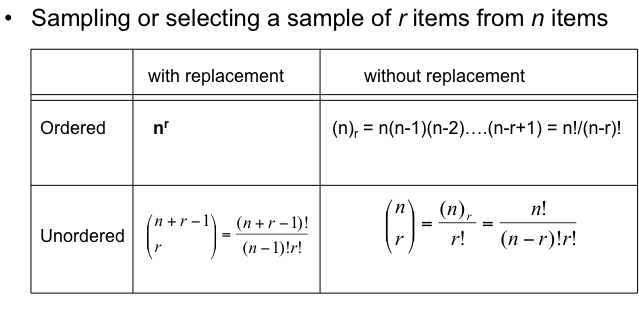

### What's the probability that river discharge exceeds a given value?

In [6]:
#Example data from River Glomma

import pandas as pd

discharge_data=pd.read_csv('760.txt.tsv', skiprows=15, delimiter='\t', skipfooter=4, na_values=-9999)

In [10]:
discharge_data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg Annual
0,1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,328,700,359,175,NaN
1,1902,138.0,113.0,118.0,205.0,1012.0,1546.0,877.0,1067.0,1052,379,271,96,572.83
2,1903,80.0,129.0,270.0,363.0,1706.0,1973.0,1026.0,1236.0,812,622,579,217,751.08
3,1904,163.0,136.0,106.0,460.0,1381.0,1900.0,758.0,412.0,354,250,159,103,515.17
4,1905,70.0,101.0,120.0,146.0,1373.0,1596.0,1062.0,732.0,564,406,296,168,552.83


<IPython.core.display.Javascript object>


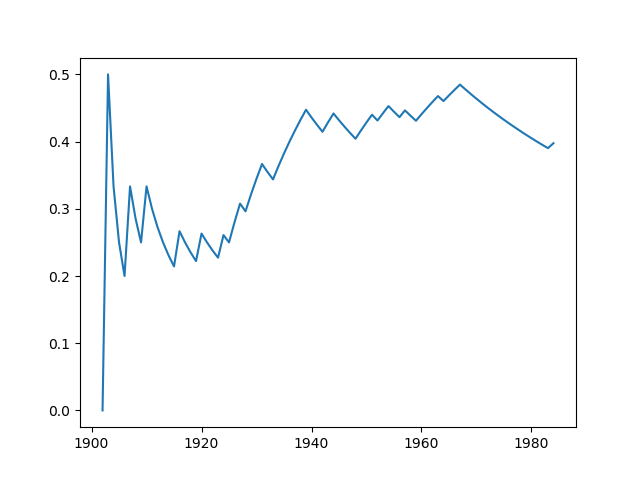

In [11]:
Q_threshold = 700.
P=[]
for thisyear in discharge_data.Year:
    Qs = discharge_data['Avg Annual'][discharge_data.Year<=thisyear].dropna()
    P.append( (Qs>Q_threshold).sum()/len(Qs) )
    
plt.plot(discharge_data.Year, P)

## Set Theory

Set theory is helpful when working with probabilities.

Some sample spaces may be *discrete*, others may be *continuous*. When the sample space is discrete the individual points or subset of points making up an event may be **countable**. In a continuous case, they are made up of a **continuum of sample points**. In the discrete case, the space may be further divided into a *finite* case or an *infinite* case -- whereby there are a potentially infinite number of sample points.

For the case of a continuous sample space, the sample points are inherently infinite.

An event however, regardless of whether it comes from a continuous or discrete sample space will always contain one or more sample points (unless it is an *impossible event* ). For probability calculations, we are always refering to an event within a certain sample space.


#### Special Events:

__Impossible Event__ - ($\emptyset$), an event with no sample points. An __empty set__ in a sample space.

__Certain Event__ - ($S$), event containing **ALL** sample points in a sample space (e.g. the Sample Space itself)

__Complementary Event__ - ($\complement$), For an event $E$ in a sample space $S$, the complementary event $\bar{E}$ contains all points that are __not__ in the event $E$.


#### The Venn Diagram

Venn diagrams provide a tool for visualizing rather simple probabilistic events. The classic Venn diagrams are composed of a rectangle representing the *sample space* ($S$) with one or more *event* ($E$) contained within the rectangle. The primary operational rules of set theory may then be visually explained:

##### Intersection $\bigcap$: 
![alt text](http://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Venn0001.svg/200px-Venn0001.svg.png "Intersection")

##### Union $\bigcup$: 
![alt text](http://upload.wikimedia.org/wikipedia/commons/thumb/3/30/Venn0111.svg/200px-Venn0111.svg.png "Union")

##### Difference $\Delta$ 
![alt text](http://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Venn0110.svg/200px-Venn0110.svg.png "Symmetric Difference")


[**Further Reading**] http://en.wikipedia.org/wiki/Set_(mathematics)

In addition to the above figures there are several other important operations:

##### Superset $\supset$ and Subset $\subset$: 


$A \supset B$	proper superset / strict superset	set A has more elements than set B	{9,14,28} ⊃ {9,14}

$A \subset B$	proper subset / strict subset	subset has fewer elements than the set	{9,14} ⊂ {9,14,28}

### Operational Rules of Set Theory

#### Equality of sets

Two set are *equal* if and only if both sets contain exactly the same sample points:

$A \cup \emptyset = A$

$A \cap \emptyset = \emptyset$

$A \cup A = A$

$A \cap A = A$

$A \cup S = S$

$A \cap S = A$

#### Complementary Sets

$E \cup \bar{E} = S$

$E \cap \bar{E} = \emptyset$

*note* the complement of the complement is the original event.

#### Commutative Rule

$A \cup B = B \cup A$

$A \cap B = B \cap A$

#### Associative Rule

$(A \cup B) \cup C = A \cup (B \cup C)$

$(A \cap B) \cap C = A \cap (B \cap C)$

#### Distributive Rule

$(A \cup B) \cap C = (A \cap C) \cup (B \cap C)$

$(A \cap B) \cup C = (A \cup C) \cap (B \cup C)$

Note that we can (almost) think of the **Union** mapped to *addition* and **Intersection** mapped to *multiplication* in order to use the traditional rules of algebra for hierarchy of operational order.


#### De Morgan's laws

$\overline{ (A \cup B) } = \bar{A} \cap \bar{B}$

$\overline{ (A \cap B) } = \bar{A} \cup \bar{B}$

When in doubt, a drawing of A, B and C as overlapping areas helps a lot.

## Calculating with probabilities

So far we have assumed a **non negative measure** that we call **Probability** is associated with every *event*. This non negative measure, *probability* has certain properties and follow certain operational rules. The *Theory of Probability* is based on fundamental assumptions, or **axioms**, as follows:

For every event $E$ in the sample space, $S$, there exists a probabilty:

**[1]** $ P(E) \geq 0$

Secondly, the probability of the *certain event*, $S$ is:

**[2]** $ P(S) = 1.0 $

Finally, for two events $E_1$ and $E_2$ that are *mutually exclusive*:

**[3]** $ P(E_1 \cup E_2) = P(E_1) + P(E_2) $


These axioms (assumptions) are fundamental to and constitute the basis for *probability theory*. They are not subject to proof. In practice and reality, the probability of an event is a relative measure -- and we define it naturally to be a nonnegative number (e.g. [1]). We define an event $E$ within a sample space $S$, and therefore it is convenient that we normalize the relative measure with respect to the probability of $S$. On the basis of the assumptions [1] and [2] it can be seen clearly then, that our probabilities in general are bounded:

$ 0 \leq P(E) \leq 1.0 $

#### Relative Frequency

We often measure the world in terms of a collection of observations. A limited subset of all possible *events*. Let's think about the relative events in relation to the third axiom -- the additive rule. If we see an event $E_1$ occurs $n_1$ times among $n$ repetitions of an experiement, and a second event $E_2$ happens to occur $n_2$ times during the same $n$ repetitions (and we know these two events are *mutually exclusive*, then we know that $E_1$ or $E_2$ will have occured ($n_1 + n_2$) times. So let's look at the probability calculation on the basis of relative frequency:

$ P(E_1 \cup E_2) = \frac{n_1 + n_2} {n} = \frac {n_1} {n} + \frac {n_2} {n}  = P(E_1) + P(E_2) $

What about $E$ with it's complement $\bar{E}$? 

$ P(E \cup \bar{E}) = P(E) + P(\bar{E}) $

Recall that the **union** of $E$ with it's complement, $\bar{E}$ is the sample space $S$. That is,

$ P(E \cup \bar{E}) = P(S) = 1.0 $

Therfore ($\therefore$), 

$P(\bar{E}) = 1 - P(E) $

#### What if they are not mutually exclusive?

We can think of the above relationship more generally for two events $E_1$ and $E_2$ in the case that they are not mutually exclusive:

$P(E_1 \cup E_2) = P(E_1) + P(E_2) - P(E_1 \cap E_2) $

To understand this, draw a Venn diagram for two overlapping events $E_1$ and $E_2$. 

## Conditional Probability and the Multiplication Rule

If the probability of an event depends on the occurence of another event then we have **conditional probability**. 

So what is the probability of $E_1$ given $E_2$? This means we assume $E_2$ has occured, and we want to find the probability of a sample point in $E_1$ that belongs to $E_2$:

$P(E_1 | E_2) = \frac {P(E_1 \cap E_2)} {P(E_2)} $

In essence, what we are doing is *normalizing* to a reconstituted sample space where the event has occured. That is, we want to know the likelihood of realizing a sample point in $E_1$ assuming that it belongs to $E_2$.

We can rearrange this equation to get the intersection, assuming that $P(E_2) \neq 0.$

$P(E_1 \cap E_2) = P(E_2) * P(E_1 | E_2) $

However, if the two events are *statistically indpendent*, that is to say $P(E_2 | E_1) = P(E_2)$ then we can calculate the **joint probability of two statistically independent events** as their product:

$P(E_1 \cap E_2) = P(E_1) * P(E_2) $

### Question:

Three cards are placed in a hat. One card is blue on both sides, one card is red on both sides, and one card has one side blue and one side red. A card is drawn at random from the hat and you see that one side is blue. What is the probability that the other side is also blue?
- (a) 1/3
- (b) 1/2
- (c) 2/3

<!---
Answer: Let $A$ be the event where the first side is blue, and let $B$ be the event where the second side is blue. The probability that both sides are blue is $P(A \cap B)=1/3$ as there is only one card that would have this. The probability that the first side is blue is $P(A)=1/2$ as half of all sides are blue. Calculating $P(B | A)$ with the formula above shows that choice **c** is correct.
-->

### A few more examples:

Consider a 100 km stretch of highway, and assume the road condition and traffic volume are uniform throughout the full stretch so that accidents are equally likely to occur anywhere on the highway. We'll define two events:

**A** = an accident within km (0-30)

**B** = an accident within km (20 - 60)

Since we have assumed equiprobability for accidents along any stretch of the 100 km of highway, then the probability of an accident within a stretch is proportional to the distance:

$P(A) = \frac {30}{100} $ and $P(B) = \frac {40}{100} $

Also:

$P(A \cap B) = 10/100 $
 
Our question to consider is "if an accident occurs in the interval (20, 60), what is the probability of event $A$?" What we are saying is that an event has occured -- an accident along the interval 20,60. So we are interested to know the proportion of the distance that belongs to $B$ within which $A$ is also realized.

$P(A|B) = \frac {P(A \cap B)} {P(B)} $

$P(A|B) = \frac{10/100}{40/100} = \frac{10}{40}$


### Xu Example 1.4

River **a** and river **b** are two adjacent tributaries of a bigger river. River **a** has a yearly discharge smaller than it's mean annual discharge $u_a$ in 50% of the years, while river **b** has a yearly discharge smaller than its mean $u_b$ in 60% of years. At any year the probability of river **b** having discharge smaller than $u_b$, given that river **a** has a discharge smaller than $u_a$ is 70%.

__Event A__: $Q_a < u_a; P(A) = 0.5 $

__Event B__: $Q_b < u_b; P(B) = 0.6 $

We also know,

$P(B | A) = 0.7 $

(i.e. $P(B|A) \neq P(B)$, therefore we know A and B are not **statistically independent**)


Calculate the probability:

**[1]** That both rivers have a discharge smaller than their mean value:

$ P(A \cap B) = P(A) * P(B | A)$

$ P(A \cap B) = 0.5 * 0.7 = 0.35 $


**[2]** That *at least* one river has a discharge smaller than it's mean:

We know these are not mutually exclusive and statistically independent, so:

$P(A \cup B) = P(A) + P(B) - P(A \cap B) = 0.5 + 0.6 - 0.35 = 0.75 $


**[3]** That river **a** has a discharge smaller than it's mean, given river **b** had a discharge smaller than the mean:

We can use the relationship we already determined, namely

$ P(A | B) = P(A \cap B) / P(B) = 0.35 / 0.6 = 0.5833$


**[4]** That *at least* one river has a discharge higher than it's mean:

$P (\bar{A} \cup \bar{B}) = ... $

Here we'll use the full sample space, De Morgan's law, and that fact that we already know the probability that *at least* one river has a discharge smaller than it's mean [2]. 

$P (\bar{A} \cup \bar{B}) = P(S) - P(A \cap B) = 1.0 - 0.35 = 0.65 $

**[5]** That both rivers have a discharge higher than their mean:

$P(\bar{A} \cap \bar{B}) = P(S) - P(A \cup B) = 1.0 - 0.75 = 0.25 $




## Frequency histogram and cumulative frequency distribution

In [14]:
discharge_data.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg Annual
79,1980,414.0,359.0,267.0,427.0,948.0,1211.0,993.0,607.0,653,891,492,448,642.50
80,1981,454.0,422.0,338.0,539.0,1313.0,1274.0,995.0,554.0,402,551,465,453,646.67
81,1982,408.0,390.0,383.0,606.0,1139.0,1179.0,689.0,490.0,352,567,542,507,604.33
82,1983,554.0,441.0,348.0,495.0,1769.0,1302.0,704.0,452.0,479,722,467,424,679.75
83,1984,447.0,385.0,296.0,480.0,1095.0,1388.0,702.0,622.0,473,1203,905,739,727.92


<IPython.core.display.Javascript object>


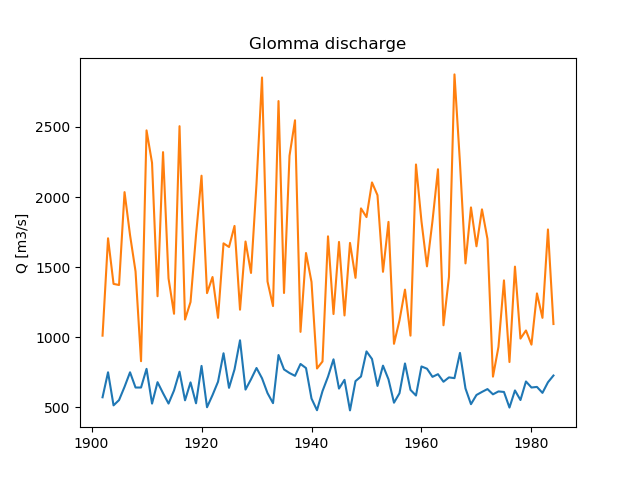

Text(0,0.5,'Q [m3/s]')

In [15]:
plt.plot(discharge_data.Year, discharge_data['Avg Annual'])
plt.plot(discharge_data.Year, discharge_data['May'])
plt.title('Glomma discharge')
plt.ylabel('Q [m3/s]')

num_obs=83
nc=15


<IPython.core.display.Javascript object>


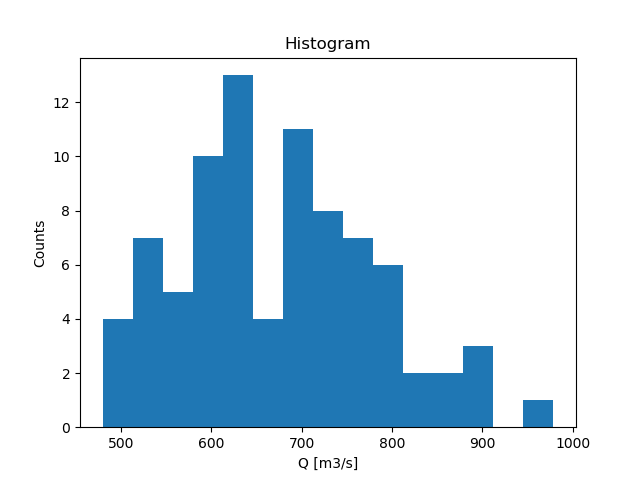

Text(0.5,1,'Histogram')

In [22]:
## Let's histogramise the annual means

flows=discharge_data['Avg Annual'].dropna().values

num_obs = len(flows)
print("num_obs=%d" %num_obs)

nc = int( 1 + 3.3 * np.log(num_obs) )
# change nc values to look at changes in shape
#nc=200

print("nc="+str(nc))

plt.figure()
ax = plt.subplot(111)
cnt, bins, patches = ax.hist(flows, bins=nc)

plt.xlabel('Q [m3/s]')
plt.ylabel('Counts')
plt.title('Histogram')


<IPython.core.display.Javascript object>


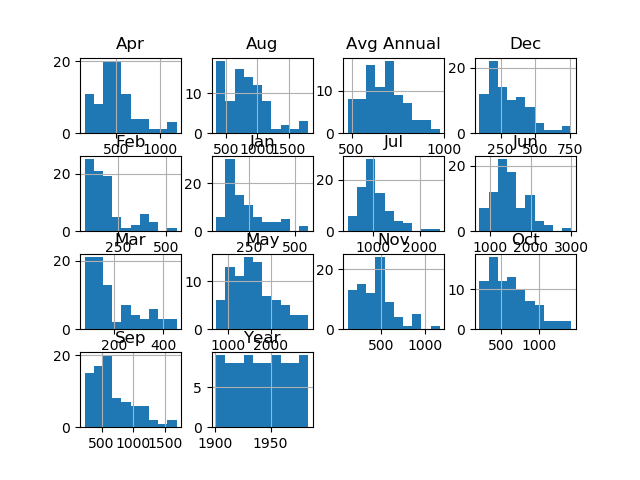

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ce712b0>,
      dtype=object)

In [20]:
discharge_data.hist()

<IPython.core.display.Javascript object>


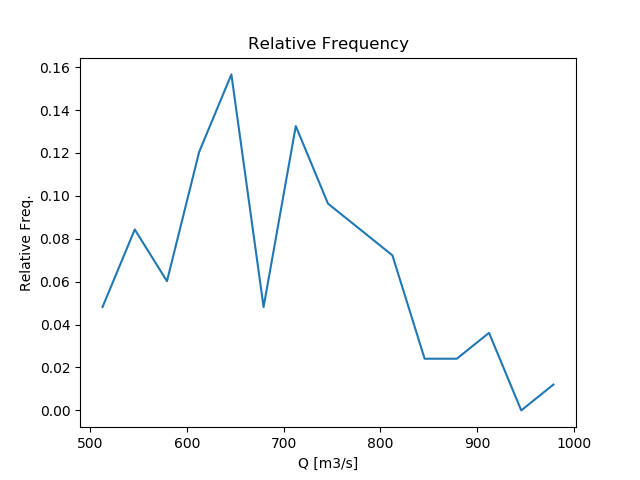

Text(0.5,1,'Relative Frequency')

In [23]:
## Relative Frequency Histogram
plt.figure()
ax = plt.subplot(111)

num_obs = float(len(flows)) #don't use integer
rel_freq = [c / num_obs for c in cnt]

plt.plot(bins[1:], rel_freq)
plt.xlabel('Q [m3/s]')
plt.ylabel('Relative Freq.')
plt.title('Relative Frequency')

<IPython.core.display.Javascript object>


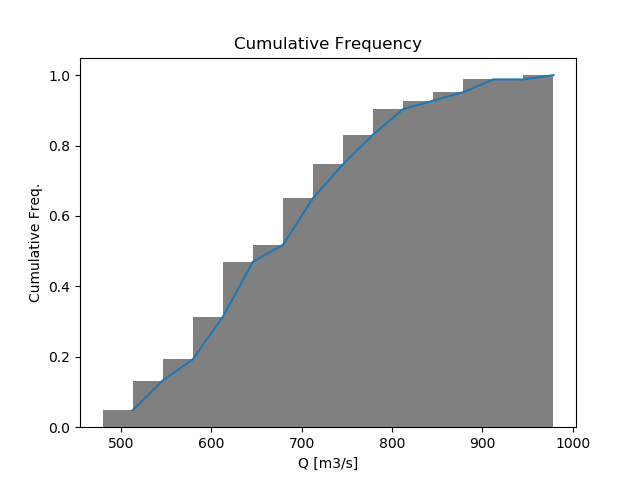

Text(0.5,1,'Cumulative Frequency')

In [24]:
#  P(Q<700)= ?

## Cumulative Frequency Histogram

plt.figure()
ax = plt.subplot(111)

ax.plot(bins[1:], np.cumsum(rel_freq))

plt.hist(flows, bins=nc, normed=True, cumulative=True, color='gray')

plt.xlabel('Q [m3/s]')
plt.ylabel('Cumulative Freq.')
plt.title('Cumulative Frequency')

### Probability Mass Function

The probability mass function, or $p.m.f.$ is for **discrete** random
variables.
We are interested in knowing the probability properties of each outcome in our sample space.
Thus, we can assign a value of $p_i$ to each of the $x_i$ in the random variable.
Note, that each $p_i$ is thus between $0$ and $1$, and the $\sum_i{p_i} = 1$

Repeating:

$p.m.f.$ of $X$ is a set of probability values ($p_i$) for each $x_i$ in
a **discrete** random variable, where:

$$0 \le p_i \le 1$$

and

$$\sum_i{p_i} = 1$$

We are interested in the *probability* that a value drawn from the random variable $X$ *takes* the value $x_i$, which is written:

$$P(X = x_i) = p_i$$

### Cumulative Distribution Function -- discrete case

Denoted $F(x) = P(X \le x)$, we can use the *cumulative distribution
function*, $c.d.f$ to evaluate the probability properties of a random
variable.

Note, that all that is required for the $c.d.f.$ is to calculate the
cumulative sum (i.e. cumsum) of the $p.m.f.$.

Knowledge of either the $c.d.f.$ or the $p.m.f.$ of a random variable
allows the other to be calculated:

$$F(x) = \sum_{y=y\le x}{P(X = y)}$$

where $P(X=y)= p_i$

The $c.d.f.$ is an increasing step function, with steps at each value of
the random variable. The heights of each step are simply the
probabilities associated with each value.

### Probability Density Function

The analogue to $p.m.f.$ for a *continuous* random variable is the
$p.d.f.$, or **probability density function**. Continuous random
variables are members of the set of real numbers ${\rm I\!R}$ and $x$
may take any value within a continuous region.

Some examples of continuous random variables are instantaneous
streamflow, soil moisture values, temperature and humidity. We can still
define limits to the random variable, so that they may be within
$0 \le x \le \infty$ for example.

Note that many continuous random variables are measured at discrete
intervals. So, for instance, you might have daily precipitation
measurements. But the *value* of the precipitation is what falls on the
continuous interval. But this can be further confused by the fact that
some measurement devices can only provide a value to a certain
sensitivity. Often times continuous random variables are measured in
discrete terms (e.g. think about a compass heading). What truly
distinguishes a discrete from continuous random variable is how we
define the probablistic properties.

For continuous random variables, a $p.d.f.$ is used. This function
$f(x)$ must evaluate to a positive value and integrate to 1 over the
whole sample space. So we have:

$$f(x) \ge 0$$

and

$$\int_{S} {f(x)dx} = 1$$

To find the probability that the value of interest lies within the
region of interest, we integrate the $p.d.f.$ between the two values.

$$P(a \le X \le b) = \int_{a}^b{f(x)dx}$$

**NOTE** Perhaps the most important way to distinguish between discrete
and continuous random variables is that fact that a **continuous random
variable cannot take a specific value of x**. Put another way, the
probability that $X$ takes the value $a$ is always $0$!

Let's look closer:

$$P(X=a) = \int_{a}^a{f(x)dx} = F(a) - F(a) = 0$$


### Cumulative Distribution Function -- Continuous case

The $CDF$ of a continuous random variable $X$ is defined in the exact
same manner as the discrete case:

$$F(x) = P(X \le x)$$

Characteristics of the $CDF$ are that it is a function $F(x)$ that
provides a **nondecreasing** response with an initial value of $0$ prior
to the sample space and reaching $1$ at the end. Values outside the sample
space $S$ are $0$.

As is the case with the $c.d.f.$ of the discrete probability mass
function, knowledge of the $CDF$ or the $p.d.f.$ allows the other to be
calculated. Whereas the $c.d.f.$ is the sum of probabilities in the
discrete case, the $CDF$, is the integral:

$$F(x) = P(X \le x) = \int_{-\infty}^x{f(y)dy}$$

#  Reading assignment on reproducibility


Nature tech feature

 